    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


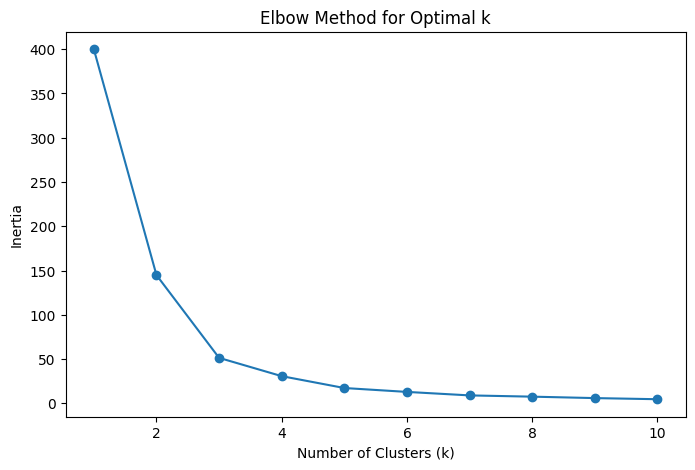

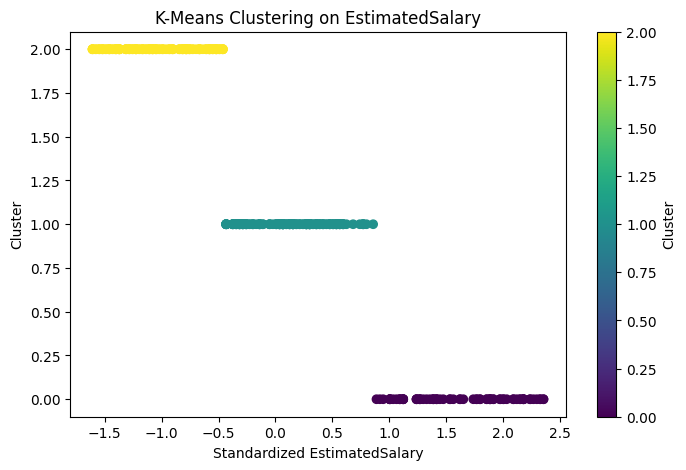

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = "C:/Users/sande/OneDrive/Pictures/Screenshots/NOTION/ML Dataset/LP-1 Dataset/K-Means & Hirarchical Clustering/Social_Network_Ads.csv"  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display the dataset structure to understand the columns
print(data.head())

    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [3]:

# Step 1: Data Pre-processing
# Label encoding if there are categorical columns
if 'Gender' in data.columns:
    le = LabelEncoder()
    data['Gender'] = le.fit_transform(data['Gender'])  # Converts 'Male'/'Female' to 0/1

# Selecting the 'EstimatedSalary' for clustering
X = data[['EstimatedSalary']]

# Scale the data for better clustering performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Step 2: Applying K-Means Clustering
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

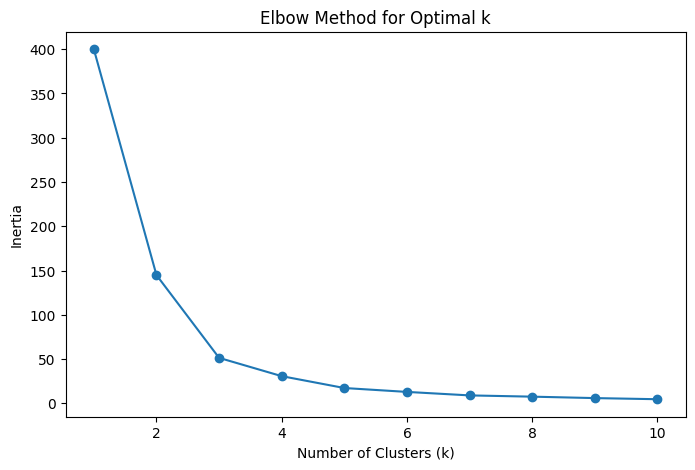

In [5]:
# Plot the Elbow graph to visualize the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [6]:

# Choose the number of clusters based on the elbow graph
optimal_k = 3  # Replace this value after observing the elbow point

# Fit K-Means with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

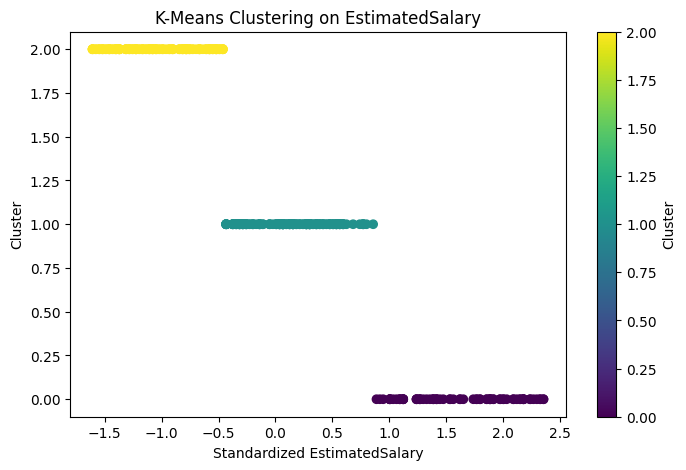

In [7]:


# Step 3: Visualize the Clusters
# Plotting the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled, data['Cluster'], c=data['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Standardized EstimatedSalary')
plt.ylabel('Cluster')
plt.title('K-Means Clustering on EstimatedSalary')
plt.colorbar(label='Cluster')
plt.show()
